In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [40]:
from google.colab import files
uploaded1 = files.upload()
uploaded2 = files.upload()
trader_filename = list(uploaded1.keys())[0]
sentiment_filename = list(uploaded2.keys())[0]
trader_data = pd.read_csv(trader_filename)
sentiment_data = pd.read_csv(sentiment_filename)


Saving historical_data.csv to historical_data (1).csv


Saving fear_greed_index.csv to fear_greed_index (1).csv


In [59]:
trader_data.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,DateTime,Date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02 22:50:00,2024-12-02
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02 22:50:00,2024-12-02
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02 22:50:00,2024-12-02
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02 22:50:00,2024-12-02
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02 22:50:00,2024-12-02


In [61]:
sentiment_data.head()

,timestamp,value,classification,date,DateTime,Date
0,1517463000,30,Fear,01-02-2018,2018-02-01,2018-02-01
1,1517549400,15,Extreme Fear,02-02-2018,2018-02-02,2018-02-02
2,1517635800,40,Fear,03-02-2018,2018-02-03,2018-02-03
3,1517722200,24,Extreme Fear,04-02-2018,2018-02-04,2018-02-04
4,1517808600,11,Extreme Fear,05-02-2018,2018-02-05,2018-02-05


In [62]:
trader_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Account           211224 non-null  object        
 1   Coin              211224 non-null  object        
 2   Execution Price   211224 non-null  float64       
 3   Size Tokens       211224 non-null  float64       
 4   Size USD          211224 non-null  float64       
 5   Side              211224 non-null  object        
 6   Timestamp IST     211224 non-null  object        
 7   Start Position    211224 non-null  float64       
 8   Direction         211224 non-null  object        
 9   Closed PnL        211224 non-null  float64       
 10  Transaction Hash  211224 non-null  object        
 11  Order ID          211224 non-null  int64         
 12  Crossed           211224 non-null  bool          
 13  Fee               211224 non-null  float64       
 14  Trad

In [63]:
sentiment_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   timestamp       2644 non-null   int64         
 1   value           2644 non-null   int64         
 2   classification  2644 non-null   object        
 3   date            2644 non-null   object        
 4   DateTime        2644 non-null   datetime64[ns]
 5   Date            2644 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 124.1+ KB


In [64]:
trader_data.describe()

,Execution Price,Size Tokens,Size USD,Start Position,Closed PnL,Order ID,Fee,Trade ID,Timestamp,DateTime
count,211224.000000,2.112240e+05,2.112240e+05,2.112240e+05,211224.000000,2.112240e+05,211224.000000,2.112240e+05,2.112240e+05,211224
mean,11414.723350,4.623365e+03,5.639451e+03,-2.994625e+04,48.749001,6.965388e+10,1.163967,5.628549e+14,1.737744e+12,2025-01-31 12:04:22.915009792
min,0.000005,8.740000e-07,0.000000e+00,-1.433463e+07,-117990.104100,1.732711e+08,-1.175712,0.000000e+00,1.680000e+12,2023-05-01 01:06:00
25%,4.854700,2.940000e+00,1.937900e+02,-3.762311e+02,0.000000,5.983853e+10,0.016121,2.810000e+14,1.740000e+12,2024-12-31 21:00:45
50%,18.280000,3.200000e+01,5.970450e+02,8.472793e+01,0.000000,7.442939e+10,0.089578,5.620000e+14,1.740000e+12,2025-02-24 18:55:00
75%,101.580000,1.879025e+02,2.058960e+03,9.337278e+03,5.792797,8.335543e+10,0.393811,8.460000e+14,1.740000e+12,2025-04-02 18:22:00
max,109004.000000,1.582244e+07,3.921431e+06,3.050948e+07,135329.090100,9.014923e+10,837.471593,1.130000e+15,1.750000e+12,2025-05-01 12:13:00
std,29447.654868,1.042729e+05,3.657514e+04,6.738074e+05,919.164828,1.835753e+10,6.758854,3.257565e+14,8.689920e+09,NaN


In [65]:
sentiment_data.describe()

,timestamp,value,DateTime
count,2.644000e+03,2644.000000,2644
mean,1.631899e+09,46.981089,2021-09-17 11:44:45.022692864
min,1.517463e+09,5.000000,2018-02-01 00:00:00
25%,1.574811e+09,28.000000,2019-11-26 18:00:00
50%,1.631900e+09,46.000000,2021-09-17 12:00:00
75%,1.688989e+09,66.000000,2023-07-10 06:00:00
max,1.746164e+09,95.000000,2025-05-02 00:00:00
std,6.597967e+07,21.827680,NaN


In [66]:
trader_data.isnull().sum()

,0
Account,0
Coin,0
Execution Price,0
Size Tokens,0
Size USD,0
Side,0
Timestamp IST,0
Start Position,0
Direction,0
Closed PnL,0


In [67]:
sentiment_data.isnull().sum()

,0
timestamp,0
value,0
classification,0
date,0
DateTime,0
Date,0


In [68]:
# Converting Trader timestamps (format: DD-MM-YYYY HH:MM)
trader_data['DateTime'] = pd.to_datetime(trader_data['Timestamp IST'],
                                          format='%d-%m-%Y %H:%M',
                                          errors='coerce')
# Converting Sentiment dates (format: DD-MM-YYYY)
sentiment_data['DateTime'] = pd.to_datetime(sentiment_data['date'],
                                            format='%d-%m-%Y',
                                            errors='coerce')
# Extracting Date only (no time) for merging
trader_data['Date'] = trader_data['DateTime'].dt.date
sentiment_data['Date'] = sentiment_data['DateTime'].dt.date
# Checking conversions
invalid_trader = trader_data['DateTime'].isna().sum()
invalid_sentiment = sentiment_data['DateTime'].isna().sum()
print(f"\nConversion Results:")
print(f"   Trader data: {len(trader_data) - invalid_trader:,} valid, {invalid_trader} invalid")
print(f"   Sentiment data: {len(sentiment_data) - invalid_sentiment:,} valid, {invalid_sentiment} invalid")

if invalid_trader == 0 and invalid_sentiment == 0:
    print("\n   ✅ All dates converted successfully!")
else:
    if invalid_trader > 0:
        print(f"\n   ⚠️ {invalid_trader} invalid dates in trader data")
    if invalid_sentiment > 0:
        print(f"   ⚠️ {invalid_sentiment} invalid dates in sentiment data")

# Showing date ranges
print(f"\nDate Ranges:")
print(f"   Trader: {trader_data['Date'].min()} to {trader_data['Date'].max()}")
print(f"   Sentiment: {sentiment_data['Date'].min()} to {sentiment_data['Date'].max()}")

# Checking overlap
trader_dates = set(trader_data['Date'].dropna())
sentiment_dates = set(sentiment_data['Date'].dropna())
overlap_dates = trader_dates.intersection(sentiment_dates)

print(f"\nDate Coverage:")
print(f"   Trader unique dates: {len(trader_dates)}")
print(f"   Sentiment unique dates: {len(sentiment_dates)}")
print(f"   Overlapping dates: {len(overlap_dates)}")
print(f"   Coverage: {len(overlap_dates)/len(trader_dates)*100:.1f}%")

# Verifying sample conversions
print("\nSample Conversions:")
print("\nTrader data:")
print(trader_data[['Timestamp IST', 'DateTime', 'Date']].head())
print("\nSentiment data:")
print(sentiment_data[['date', 'DateTime', 'Date']].head())


Conversion Results:
   Trader data: 211,224 valid, 0 invalid
   Sentiment data: 2,644 valid, 0 invalid

   ✅ All dates converted successfully!

Date Ranges:
   Trader: 2023-05-01 to 2025-05-01
   Sentiment: 2018-02-01 to 2025-05-02

Date Coverage:
   Trader unique dates: 480
   Sentiment unique dates: 2644
   Overlapping dates: 479
   Coverage: 99.8%

Sample Conversions:

Trader data:
      Timestamp IST            DateTime        Date
0  02-12-2024 22:50 2024-12-02 22:50:00  2024-12-02
1  02-12-2024 22:50 2024-12-02 22:50:00  2024-12-02
2  02-12-2024 22:50 2024-12-02 22:50:00  2024-12-02
3  02-12-2024 22:50 2024-12-02 22:50:00  2024-12-02
4  02-12-2024 22:50 2024-12-02 22:50:00  2024-12-02

Sentiment data:
         date   DateTime        Date
0  01-02-2018 2018-02-01  2018-02-01
1  02-02-2018 2018-02-02  2018-02-02
2  03-02-2018 2018-02-03  2018-02-03
3  04-02-2018 2018-02-04  2018-02-04
4  05-02-2018 2018-02-05  2018-02-05


In [69]:
# ============================================
# MERGE DATASETS
# ============================================

print("\n" + "="*70)
print("🔗 MERGING DATASETS")
print("="*70)

# Merging trader data with sentiment
merged_data = trader_data.merge(
    sentiment_data[['Date', 'classification', 'value']],
    on='Date',
    how='left'
)

# Renaming columns for clarity
merged_data.rename(columns={
    'classification': 'Sentiment',
    'value': 'Sentiment_Score'
}, inplace=True)

print(f"\n✅ Merge complete!")
print(f"   Total records: {len(merged_data):,}")
print(f"   With sentiment: {merged_data['Sentiment'].notna().sum():,} ({merged_data['Sentiment'].notna().sum()/len(merged_data)*100:.1f}%)")
print(f"   Without sentiment: {merged_data['Sentiment'].isna().sum():,}")

# Create clean dataset (only trades with sentiment data)
merged_clean = merged_data[merged_data['Sentiment'].notna()].copy()
print(f"\n   Clean dataset: {len(merged_clean):,} trades")

# Add useful derived columns
merged_clean['Is_Profitable'] = (merged_clean['Closed PnL'] > 0).astype(int)
merged_clean['Hour'] = merged_clean['DateTime'].dt.hour
merged_clean['DayOfWeek'] = merged_clean['DateTime'].dt.day_name()
merged_clean['Month'] = merged_clean['DateTime'].dt.month

print("\n🔍 Merged Data Sample:")
print(merged_clean[['Date', 'Account', 'Coin', 'Direction', 'Size USD',
                    'Closed PnL', 'Sentiment', 'Sentiment_Score']].head(10))


🔗 MERGING DATASETS

✅ Merge complete!
   Total records: 211,224
   With sentiment: 211,218 (100.0%)
   Without sentiment: 6

   Clean dataset: 211,218 trades

🔍 Merged Data Sample:
         Date                                     Account  Coin Direction  \
0  2024-12-02  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107       Buy   
1  2024-12-02  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107       Buy   
2  2024-12-02  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107       Buy   
3  2024-12-02  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107       Buy   
4  2024-12-02  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107       Buy   
5  2024-12-02  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107       Buy   
6  2024-12-02  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107       Buy   
7  2024-12-02  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107       Buy   
8  2024-12-02  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107       Buy   
9  2024-12-02  0xae5eacaf9c6b9111fd53034a602c192

In [70]:
# ============================================
# FEATURE ENGINEERING
# ============================================

print("\n" + "="*70)
print("🔧 FEATURE ENGINEERING")
print("="*70)

# Calculating additional metrics
merged_clean['Trade_Value'] = merged_clean['Size USD']
merged_clean['PnL_Percentage'] = (merged_clean['Closed PnL'] / merged_clean['Start Position'] * 100).fillna(0)

# Categorizing sentiment into bins
def categorize_sentiment(row):
    if pd.isna(row['Sentiment']):
        return 'Unknown'
    sentiment = row['Sentiment'].lower()
    if 'extreme fear' in sentiment:
        return 'Extreme Fear'
    elif 'fear' in sentiment:
        return 'Fear'
    elif 'extreme greed' in sentiment:
        return 'Extreme Greed'
    elif 'greed' in sentiment:
        return 'Greed'
    else:
        return 'Neutral'

merged_clean['Sentiment_Category'] = merged_clean.apply(categorize_sentiment, axis=1)

print(f"\n✅ Features engineered successfully!")
print(f"\nSentiment Distribution:")
print(merged_clean['Sentiment_Category'].value_counts())


🔧 FEATURE ENGINEERING

✅ Features engineered successfully!

Sentiment Distribution:
Sentiment_Category
Fear             61837
Greed            50303
Extreme Greed    39992
Neutral          37686
Extreme Fear     21400
Name: count, dtype: int64


In [71]:
# ============================================
#AGGREGATE DAILY METRICS BY TRADER
# ============================================

print("\n" + "="*70)
print("📊 AGGREGATING DAILY METRICS")
print("="*70)

# Aggregating by Date and Account
daily_trader_metrics = merged_clean.groupby(['Date', 'Account']).agg({
    'Closed PnL': ['sum', 'mean', 'count', 'std'],
    'Size USD': ['sum', 'mean'],
    'Trade_Value': 'sum',
    'Is_Profitable': 'mean',
    'Sentiment_Category': lambda x: x.mode()[0] if len(x.mode()) > 0 else 'Unknown',
    'Sentiment_Score': 'first'
}).reset_index()

# Flatten column names
daily_trader_metrics.columns = ['_'.join(col).strip('_') for col in daily_trader_metrics.columns.values]

# Renaming for clarity
daily_trader_metrics.rename(columns={
    'Closed PnL_sum': 'Total_PnL',
    'Closed PnL_mean': 'Avg_PnL_Per_Trade',
    'Closed PnL_count': 'Num_Trades',
    'Closed PnL_std': 'PnL_Volatility',
    'Size USD_sum': 'Total_Volume',
    'Size USD_mean': 'Avg_Trade_Size',
    'Trade_Value_sum': 'Total_Trade_Value',
    'Is_Profitable_mean': 'Win_Rate',
    'Sentiment_Category_<lambda>': 'Sentiment',
    'Sentiment_Score_first': 'Sentiment_Score'
}, inplace=True)

print(f"\n✅ Daily metrics aggregated!")
print(f"   Total trader-days: {len(daily_trader_metrics):,}")
print(f"\n📋 Daily Metrics Sample:")
print(daily_trader_metrics.head(10))


📊 AGGREGATING DAILY METRICS

✅ Daily metrics aggregated!
   Total trader-days: 2,340

📋 Daily Metrics Sample:
         Date                                     Account    Total_PnL  \
0  2023-05-01  0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891     0.000000   
1  2023-12-05  0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23     0.000000   
2  2023-12-14  0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23  -205.434737   
3  2023-12-15  0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23   -24.632034   
4  2023-12-16  0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23     0.000000   
5  2023-12-17  0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23   304.982785   
6  2023-12-18  0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23     0.000000   
7  2023-12-19  0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23  1000.538612   
8  2023-12-20  0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23   162.732282   
9  2023-12-21  0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23   537.211402   

   Avg_PnL_Per_Trade  Num_Trades  PnL_Volatility  Total_Volume  \
0       

In [72]:
# ============================================
#SENTIMENT PERFORMANCE ANALYSIS
# ============================================

print("\n" + "="*70)
print("💡 SENTIMENT-PERFORMANCE ANALYSIS")
print("="*70)

# Performance by sentiment
sentiment_performance = daily_trader_metrics.groupby('Sentiment').agg({
    'Total_PnL': ['mean', 'median', 'sum', 'std'],
    'Win_Rate': 'mean',
    'Num_Trades': ['mean', 'sum'],
    'Avg_Trade_Size': 'mean',
    'Total_Volume': 'sum',
    'Account': 'count'
}).round(4)

print("\n📈 Performance Metrics by Sentiment:")
print(sentiment_performance)

# Statistical summary
print("\n🔍 Key Insights:")
best_sentiment = daily_trader_metrics.groupby('Sentiment')['Total_PnL'].mean().idxmax()
worst_sentiment = daily_trader_metrics.groupby('Sentiment')['Total_PnL'].mean().idxmin()
print(f"   Best performing sentiment: {best_sentiment}")
print(f"   Worst performing sentiment: {worst_sentiment}")

avg_win_rate = daily_trader_metrics['Win_Rate'].mean()
print(f"   Overall average win rate: {avg_win_rate:.2%}")


💡 SENTIMENT-PERFORMANCE ANALYSIS

📈 Performance Metrics by Sentiment:
               Total_PnL                                     Win_Rate  \
                    mean    median           sum         std     mean   
Sentiment                                                               
Extreme Fear   4619.4391  218.3774  7.391102e+05  29534.8392   0.3297   
Extreme Greed  5161.9226  418.3199  2.715171e+06  27496.8638   0.3864   
Fear           5328.8182  107.8925  3.357155e+06  31659.7715   0.3640   
Greed          3318.1007  158.2149  2.150129e+06  30599.0402   0.3436   
Neutral        3438.6188  167.5517  1.292921e+06  17447.8636   0.3554   

              Num_Trades        Avg_Trade_Size  Total_Volume Account  
                    mean    sum           mean           sum   count  
Sentiment                                                             
Extreme Fear    133.7500  21400      6773.4641  1.144843e+08     160  
Extreme Greed    76.0304  39992      5371.6372  1.244652e+08

In [73]:
# ============================================
# IDENTIFY TOP TRADERS
# ============================================

print("\n" + "="*70)
print("🏆 TOP TRADERS IDENTIFICATION")
print("="*70)

# Aggregate trader-level metrics
trader_overall = daily_trader_metrics.groupby('Account').agg({
    'Total_PnL': 'sum',
    'Win_Rate': 'mean',
    'Num_Trades': 'sum',
    'Total_Volume': 'sum',
    'Avg_Trade_Size': 'mean',
    'PnL_Volatility': 'mean'
}).reset_index()

# Calculate composite score
trader_overall['PnL_per_Trade'] = trader_overall['Total_PnL'] / trader_overall['Num_Trades']

# Normalize scores (0-100)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 100))

trader_overall['PnL_Score'] = scaler.fit_transform(trader_overall[['Total_PnL']])
trader_overall['Consistency_Score'] = trader_overall['Win_Rate'] * 100
trader_overall['Volume_Score'] = scaler.fit_transform(trader_overall[['Total_Volume']])

# Overall score: 50% PnL, 30% Consistency, 20% Volume
trader_overall['Overall_Score'] = (
    trader_overall['PnL_Score'] * 0.5 +
    trader_overall['Consistency_Score'] * 0.3 +
    trader_overall['Volume_Score'] * 0.2
)

# Get top 20 traders
top_20_traders = trader_overall.nlargest(20, 'Overall_Score')

print(f"\n🌟 Top 20 Traders:")
print(top_20_traders[['Account', 'Total_PnL', 'Win_Rate', 'Num_Trades', 'Overall_Score']].to_string(index=False))

# Saving top trader accounts
top_trader_accounts = top_20_traders['Account'].tolist()


🏆 TOP TRADERS IDENTIFICATION

🌟 Top 20 Traders:
                                   Account    Total_PnL  Win_Rate  Num_Trades  Overall_Score
0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23 2.143383e+06  0.284518       14733      61.192496
0x083384f897ee0f19899168e3b1bec365f52a9012 1.600230e+06  0.352333        3818      51.720809
0x513b8629fe877bb581bf244e326a047b249c4ff1 8.404226e+05  0.325495       12236      51.574504
0xbaaaf6571ab7d571043ff1e313a9609a10637864 9.401638e+05  0.455625       21192      40.840382
0xbee1707d6b44d4d52bfe19e41f8a828645437aab 8.360806e+05  0.411029       40184      37.539626
0x75f7eeb85dc639d5e99c78f95393aa9a5f1170d4 3.790954e+05  0.710528        9893      34.334526
0x4acb90e786d897ecffb614dc822eb231b4ffb9f4 6.777471e+05  0.426408        4356      32.931423
0x4f93fead39b70a1824f981a54d4e55b278e9f760 3.089759e+05  0.301214        7584      25.485924
0x2c229d22b100a7beb69122eed721cee9b24011dd 1.686580e+05  0.498708        3239      22.686164
0xb899e522b5715391ae1

In [74]:
# ============================================
#TOP TRADER SENTIMENT ADAPTATION
# ============================================

print("\n" + "="*70)
print("🎯 TOP TRADER SENTIMENT ADAPTATION")
print("="*70)

# Filter data for top traders
top_trader_data = daily_trader_metrics[daily_trader_metrics['Account'].isin(top_trader_accounts)]

# Analyze how top traders adapt to sentiment
adaptation_analysis = top_trader_data.groupby(['Sentiment', 'Account']).agg({
    'Total_PnL': 'mean',
    'Win_Rate': 'mean',
    'Num_Trades': 'mean',
    'Avg_Trade_Size': 'mean'
}).reset_index()

# Pivot to see patterns
win_rate_by_sentiment = adaptation_analysis.pivot_table(
    index='Account',
    columns='Sentiment',
    values='Win_Rate',
    aggfunc='mean'
).fillna(0)

print("\n📊 Win Rate by Sentiment (Top 10 Traders):")
print(win_rate_by_sentiment.head(10))

# Average metrics by sentiment for top traders
print("\n📈 Top Traders Performance by Sentiment:")
top_trader_sentiment = top_trader_data.groupby('Sentiment').agg({
    'Total_PnL': 'mean',
    'Win_Rate': 'mean',
    'Num_Trades': 'mean'
}).round(4)
print(top_trader_sentiment)



🎯 TOP TRADER SENTIMENT ADAPTATION

📊 Win Rate by Sentiment (Top 10 Traders):
Sentiment                                   Extreme Fear  Extreme Greed  \
Account                                                                   
0x083384f897ee0f19899168e3b1bec365f52a9012      0.409091       0.115881   
0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd      0.320755       0.504814   
0x28736f43f1e871e6aa8b1148d38d4994275d72c4      0.314457       0.457205   
0x2c229d22b100a7beb69122eed721cee9b24011dd      0.773639       0.454377   
0x3f9a0aadc7f04a7c9d75dc1b5a6ddd6e36486cf6      1.000000       0.442370   
0x420ab45e0bd8863569a5efbb9c05d91f40624641      0.049180       0.510000   
0x430f09841d65beb3f27765503d0f850b8bce7713      0.000000       1.000000   
0x47add9a56df66b524d5e2c1993a43cde53b6ed85      0.224984       0.372359   
0x4acb90e786d897ecffb614dc822eb231b4ffb9f4      0.352053       0.414232   
0x4f93fead39b70a1824f981a54d4e55b278e9f760      0.409944       0.312659   

Sentiment            

In [75]:
# ============================================
# PATTERN DISCOVERY
# ============================================

print("\n" + "="*70)
print("🔍 PATTERN DISCOVERY")
print("="*70)

# 1. Temporal Patterns
print("\n⏰ TEMPORAL PATTERNS:")
print("\nHourly Performance:")
hourly_stats = merged_clean.groupby('Hour').agg({
    'Closed PnL': ['mean', 'sum', 'count'],
    'Size USD': 'mean'
}).round(4)
print(hourly_stats)

print("\nDay of Week Performance:")
daily_stats = merged_clean.groupby('DayOfWeek').agg({
    'Closed PnL': ['mean', 'sum'],
    'Size USD': 'sum'
}).round(4)
print(daily_stats)

# 2. Coin/Symbol Analysis
print("\n💰 TOP PERFORMING COINS:")
coin_performance = merged_clean.groupby('Coin').agg({
    'Closed PnL': ['mean', 'sum', 'count'],
    'Size USD': 'mean'
}).sort_values(('Closed PnL', 'sum'), ascending=False)
print(coin_performance.head(10))

# 3. Direction Analysis (Buy vs Sell)
print("\n↔️ DIRECTION ANALYSIS:")
direction_stats = merged_clean.groupby('Direction').agg({
    'Closed PnL': ['mean', 'sum', 'count'],
    'Is_Profitable': 'mean'
}).round(4)
print(direction_stats)


🔍 PATTERN DISCOVERY

⏰ TEMPORAL PATTERNS:

Hourly Performance:
     Closed PnL                       Size USD
           mean          sum  count       mean
Hour                                          
0       43.1263  425052.5079   9856  7710.1989
1       49.9188  523198.6264  10481  7757.9549
2       34.2054  279834.3663   8181  7663.2641
3       43.7116  460020.5714  10524  6278.1168
4       44.4496  444895.5988  10009  6006.3317
5       40.4606  385913.3032   9538  7933.7619
6       32.9834  298730.7587   9057  4487.4757
7       83.0267  712784.3253   8585  4631.2652
8       58.8864  462140.6229   7848  5327.1534
9       44.9794  294525.2824   6548  3747.7311
10      61.3475  413788.8130   6745  2205.6943
11      76.8630  472707.4662   6150  2835.1924
12     131.1737  911657.2604   6950  3100.3619
13      52.3823  434825.8797   8301  2422.3958
14      23.1244  158171.1070   6840  3096.5767
15      58.5622  427562.2924   7301  2949.6336
16      41.9759  246188.8735   5865  4492.7


📊 GENERATING VISUALIZATIONS


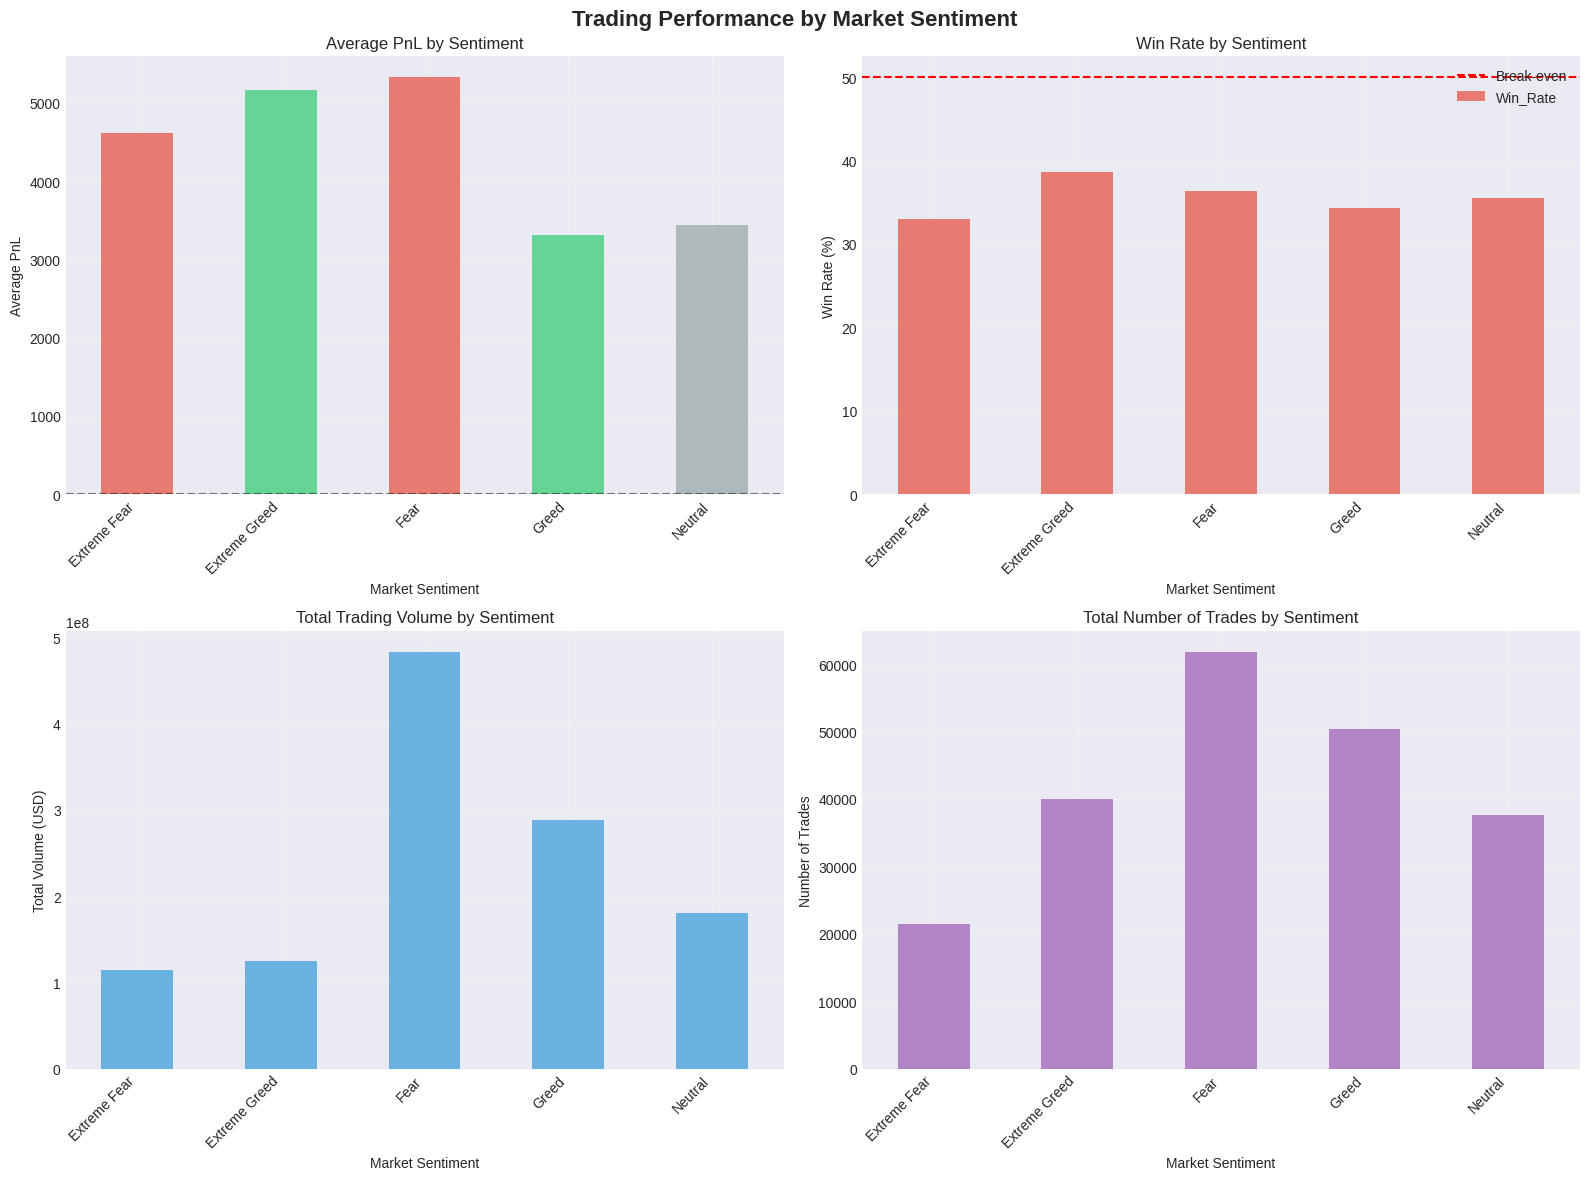


✅ Sentiment performance visualization saved!


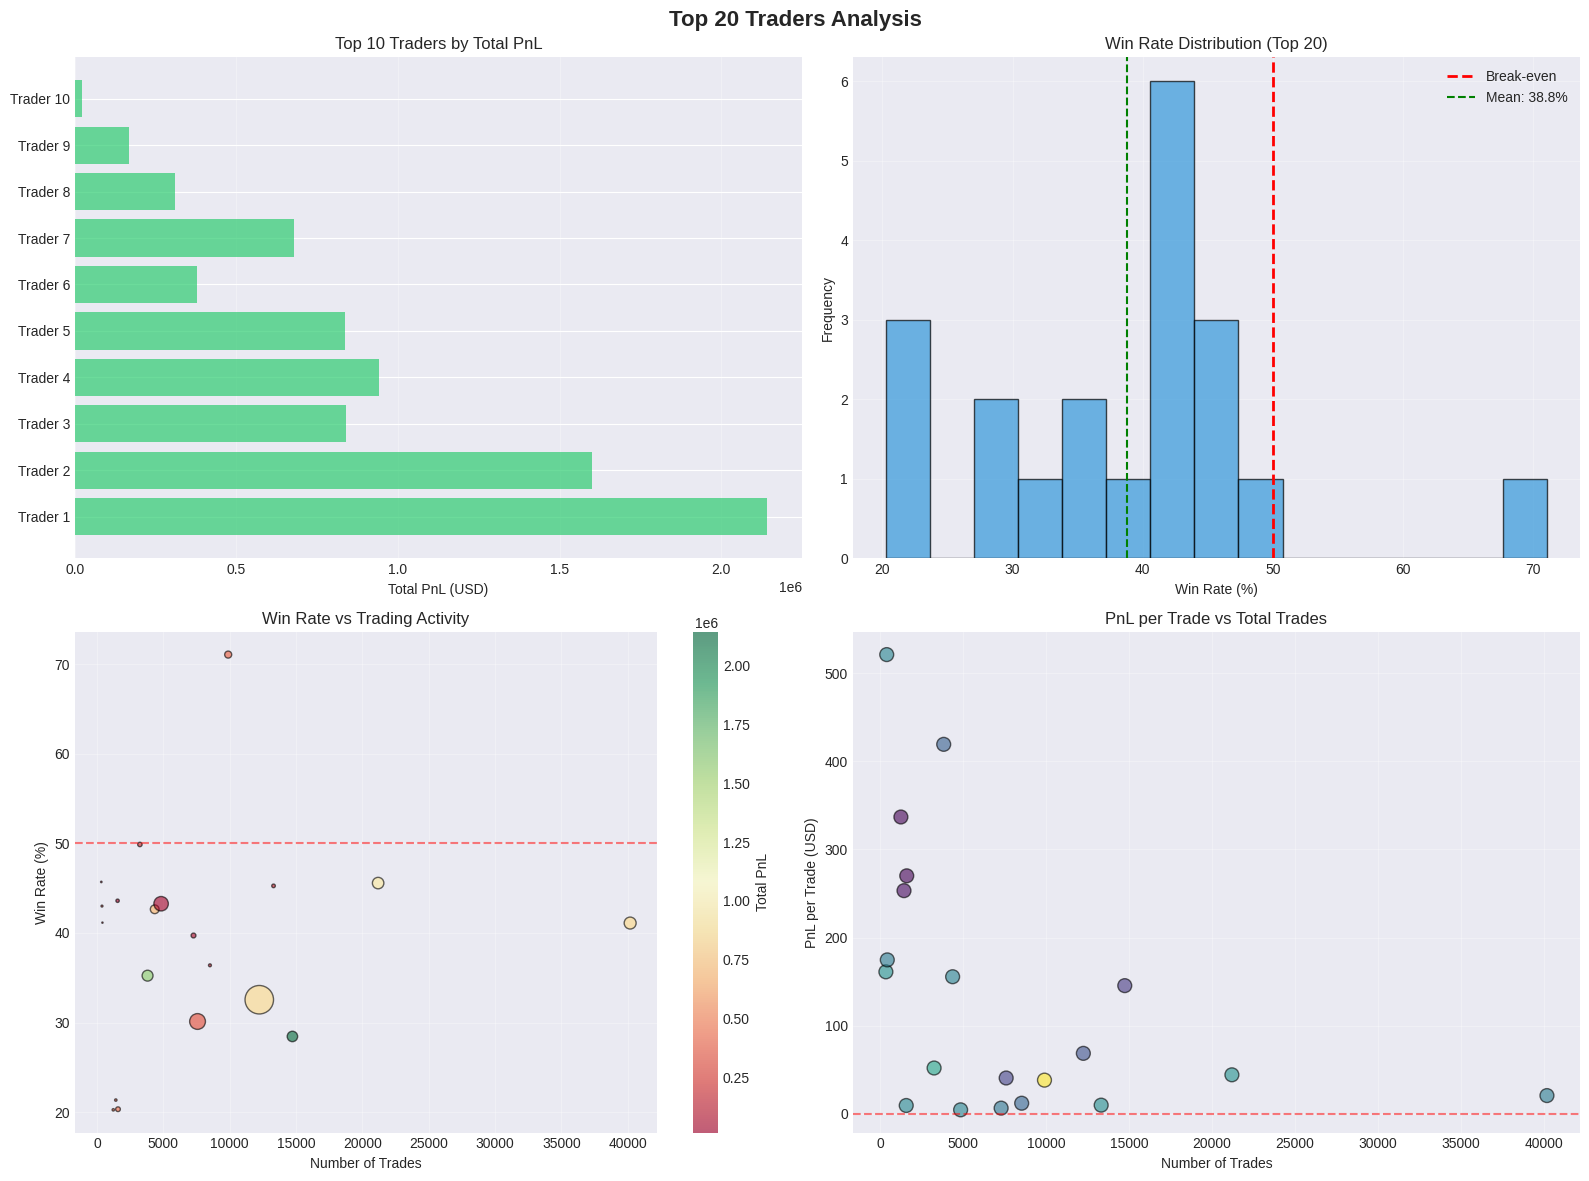


✅ Top traders visualization saved!


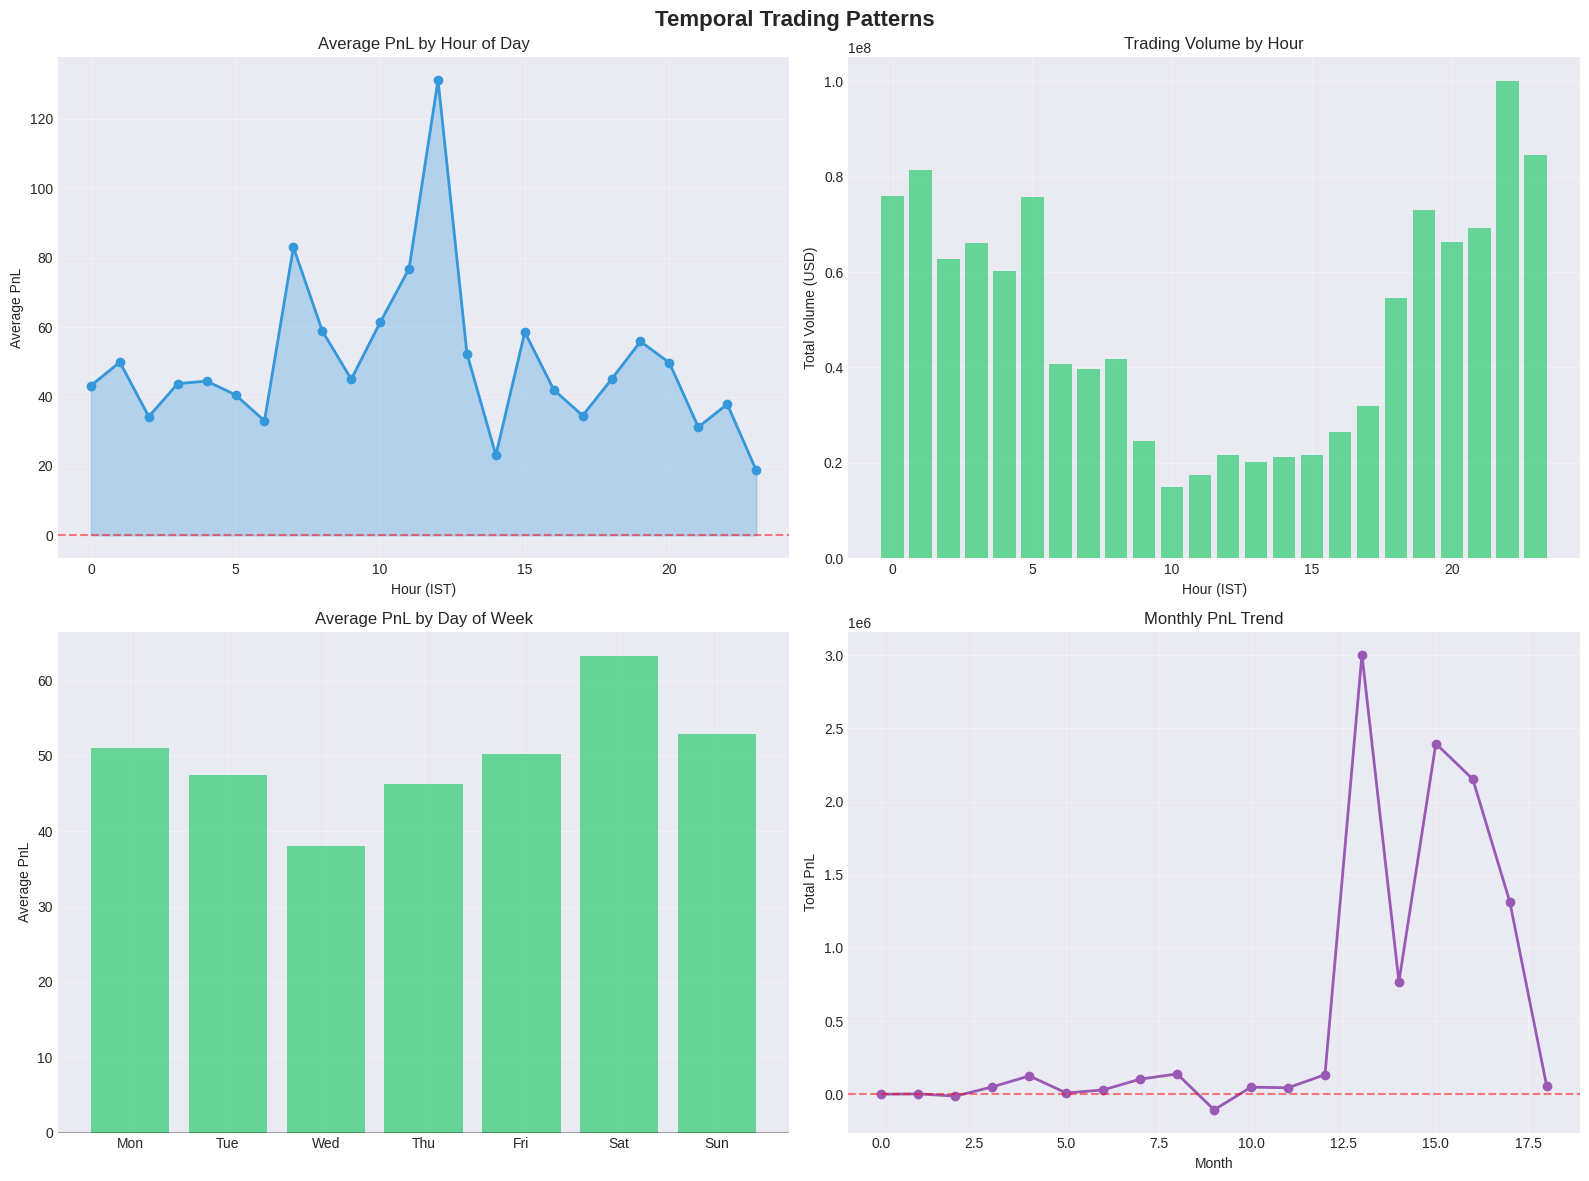


✅ Temporal patterns visualization saved!


In [76]:
# ============================================
# VISUALIZATIONS
# ============================================

print("\n" + "="*70)
print("📊 GENERATING VISUALIZATIONS")
print("="*70)

import matplotlib.pyplot as plt
import seaborn as sns

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')

# 1. Sentiment Performance
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Trading Performance by Market Sentiment', fontsize=16, fontweight='bold')

# PnL by Sentiment
ax1 = axes[0, 0]
sentiment_pnl = daily_trader_metrics.groupby('Sentiment')['Total_PnL'].mean()
colors = ['#e74c3c' if 'Fear' in s else '#2ecc71' if 'Greed' in s else '#95a5a6' for s in sentiment_pnl.index]
sentiment_pnl.plot(kind='bar', ax=ax1, color=colors, alpha=0.7)
ax1.set_title('Average PnL by Sentiment')
ax1.set_xlabel('Market Sentiment')
ax1.set_ylabel('Average PnL')
ax1.axhline(y=0, color='black', linestyle='--', alpha=0.5)
ax1.grid(True, alpha=0.3)
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45, ha='right')

# Win Rate by Sentiment
ax2 = axes[0, 1]
win_rates = daily_trader_metrics.groupby('Sentiment')['Win_Rate'].mean() * 100
colors = ['#2ecc71' if x > 50 else '#e74c3c' for x in win_rates.values]
win_rates.plot(kind='bar', ax=ax2, color=colors, alpha=0.7)
ax2.axhline(y=50, color='red', linestyle='--', label='Break-even')
ax2.set_title('Win Rate by Sentiment')
ax2.set_xlabel('Market Sentiment')
ax2.set_ylabel('Win Rate (%)')
ax2.legend()
ax2.grid(True, alpha=0.3)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45, ha='right')

# Trading Volume by Sentiment
ax3 = axes[1, 0]
volume = daily_trader_metrics.groupby('Sentiment')['Total_Volume'].sum()
volume.plot(kind='bar', ax=ax3, color='#3498db', alpha=0.7)
ax3.set_title('Total Trading Volume by Sentiment')
ax3.set_xlabel('Market Sentiment')
ax3.set_ylabel('Total Volume (USD)')
ax3.grid(True, alpha=0.3)
plt.setp(ax3.xaxis.get_majorticklabels(), rotation=45, ha='right')

# Number of Trades
ax4 = axes[1, 1]
trades = daily_trader_metrics.groupby('Sentiment')['Num_Trades'].sum()
trades.plot(kind='bar', ax=ax4, color='#9b59b6', alpha=0.7)
ax4.set_title('Total Number of Trades by Sentiment')
ax4.set_xlabel('Market Sentiment')
ax4.set_ylabel('Number of Trades')
ax4.grid(True, alpha=0.3)
plt.setp(ax4.xaxis.get_majorticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.savefig('sentiment_performance.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ Sentiment performance visualization saved!")


# 2. Top Traders Analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Top 20 Traders Analysis', fontsize=16, fontweight='bold')

# Total PnL
ax1 = axes[0, 0]
top_10 = top_20_traders.head(10)
ax1.barh(range(len(top_10)), top_10['Total_PnL'].values, color='#2ecc71', alpha=0.7)
ax1.set_yticks(range(len(top_10)))
ax1.set_yticklabels([f"Trader {i+1}" for i in range(len(top_10))])
ax1.set_title('Top 10 Traders by Total PnL')
ax1.set_xlabel('Total PnL (USD)')
ax1.grid(True, alpha=0.3, axis='x')

# Win Rate Distribution
ax2 = axes[0, 1]
ax2.hist(top_20_traders['Win_Rate']*100, bins=15, color='#3498db', alpha=0.7, edgecolor='black')
ax2.axvline(x=50, color='red', linestyle='--', linewidth=2, label='Break-even')
ax2.axvline(x=top_20_traders['Win_Rate'].mean()*100, color='green', linestyle='--',
            label=f"Mean: {top_20_traders['Win_Rate'].mean()*100:.1f}%")
ax2.set_title('Win Rate Distribution (Top 20)')
ax2.set_xlabel('Win Rate (%)')
ax2.set_ylabel('Frequency')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Win Rate vs Number of Trades
ax3 = axes[1, 0]
scatter = ax3.scatter(top_20_traders['Num_Trades'],
                     top_20_traders['Win_Rate']*100,
                     s=top_20_traders['Total_Volume']/1000000,
                     c=top_20_traders['Total_PnL'],
                     cmap='RdYlGn',
                     alpha=0.6,
                     edgecolors='black')
ax3.set_title('Win Rate vs Trading Activity')
ax3.set_xlabel('Number of Trades')
ax3.set_ylabel('Win Rate (%)')
ax3.axhline(y=50, color='red', linestyle='--', alpha=0.5)
ax3.grid(True, alpha=0.3)
plt.colorbar(scatter, ax=ax3, label='Total PnL')

# PnL per Trade
ax4 = axes[1, 1]
ax4.scatter(top_20_traders['Num_Trades'],
           top_20_traders['PnL_per_Trade'],
           c=top_20_traders['Win_Rate'],
           s=100,
           cmap='viridis',
           alpha=0.6,
           edgecolors='black')
ax4.set_title('PnL per Trade vs Total Trades')
ax4.set_xlabel('Number of Trades')
ax4.set_ylabel('PnL per Trade (USD)')
ax4.axhline(y=0, color='red', linestyle='--', alpha=0.5)
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('top_traders_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ Top traders visualization saved!")


# 3. Temporal Patterns
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Temporal Trading Patterns', fontsize=16, fontweight='bold')

# Hourly PnL
ax1 = axes[0, 0]
hourly_pnl = merged_clean.groupby('Hour')['Closed PnL'].mean()
ax1.plot(hourly_pnl.index, hourly_pnl.values, marker='o', linewidth=2, color='#3498db')
ax1.fill_between(hourly_pnl.index, hourly_pnl.values, alpha=0.3, color='#3498db')
ax1.set_title('Average PnL by Hour of Day')
ax1.set_xlabel('Hour (IST)')
ax1.set_ylabel('Average PnL')
ax1.axhline(y=0, color='red', linestyle='--', alpha=0.5)
ax1.grid(True, alpha=0.3)

# Hourly Volume
ax2 = axes[0, 1]
hourly_volume = merged_clean.groupby('Hour')['Size USD'].sum()
ax2.bar(hourly_volume.index, hourly_volume.values, color='#2ecc71', alpha=0.7)
ax2.set_title('Trading Volume by Hour')
ax2.set_xlabel('Hour (IST)')
ax2.set_ylabel('Total Volume (USD)')
ax2.grid(True, alpha=0.3)

# Day of Week PnL
ax3 = axes[1, 0]
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_pnl = merged_clean.groupby('DayOfWeek')['Closed PnL'].mean().reindex(day_order)
colors = ['#2ecc71' if x > 0 else '#e74c3c' for x in daily_pnl.values]
ax3.bar(range(len(daily_pnl)), daily_pnl.values, color=colors, alpha=0.7)
ax3.set_xticks(range(len(daily_pnl)))
ax3.set_xticklabels([d[:3] for d in day_order])
ax3.set_title('Average PnL by Day of Week')
ax3.set_ylabel('Average PnL')
ax3.axhline(y=0, color='black', linestyle='-', alpha=0.3)
ax3.grid(True, alpha=0.3)

# Monthly Trend
ax4 = axes[1, 1]
monthly_pnl = merged_clean.groupby(merged_clean['DateTime'].dt.to_period('M'))['Closed PnL'].sum()
ax4.plot(range(len(monthly_pnl)), monthly_pnl.values, marker='o', linewidth=2, color='#9b59b6')
ax4.set_title('Monthly PnL Trend')
ax4.set_xlabel('Month')
ax4.set_ylabel('Total PnL')
ax4.axhline(y=0, color='red', linestyle='--', alpha=0.5)
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('temporal_patterns.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ Temporal patterns visualization saved!")

In [77]:
# ============================================
# KEY INSIGHTS SUMMARY
# ============================================

print("\n" + "="*70)
print("💎 KEY INSIGHTS & RECOMMENDATIONS")
print("="*70)

print("\n📊 EXECUTIVE SUMMARY")
print("=" * 70)
print(f"Total Traders Analyzed: {trader_overall.shape[0]:,}")
print(f"Total Trades: {merged_clean.shape[0]:,}")
print(f"Date Range: {merged_clean['Date'].min()} to {merged_clean['Date'].max()}")
print(f"Total Trading Volume: ${merged_clean['Size USD'].sum():,.2f}")
print(f"Total PnL: ${merged_clean['Closed PnL'].sum():,.2f}")

print("\n🎯 KEY FINDINGS")
print("=" * 70)

# 1. Sentiment Impact
print("\n1. SENTIMENT-PERFORMANCE RELATIONSHIP:")
sentiment_summary = daily_trader_metrics.groupby('Sentiment').agg({
    'Total_PnL': 'mean',
    'Win_Rate': 'mean'
})
for sentiment, row in sentiment_summary.iterrows():
    print(f"   • {sentiment}: Avg PnL ${row['Total_PnL']:.2f}, Win Rate {row['Win_Rate']*100:.1f}%")

# 2. Top Trader Characteristics
print("\n2. TOP TRADER CHARACTERISTICS:")
print(f"   • Average Win Rate: {top_20_traders['Win_Rate'].mean()*100:.1f}%")
print(f"   • Average Trades: {top_20_traders['Num_Trades'].mean():.0f}")
print(f"   • Average PnL per Trade: ${top_20_traders['PnL_per_Trade'].mean():.2f}")

# 3. Optimal Trading Times
best_hour = hourly_pnl.idxmax()
print(f"\n3. TEMPORAL INSIGHTS:")
print(f"   • Best trading hour: {best_hour}:00 IST")
print(f"   • Best day: {daily_pnl.idxmax()}")

# 4. Direction Performance
print(f"\n4. TRADING DIRECTION:")
for direction, row in direction_stats.iterrows():
    print(f"   • {direction}: Win Rate {row[('Is_Profitable', 'mean')]*100:.1f}%")

print("\n🎯 STRATEGIC RECOMMENDATIONS")
print("=" * 70)
recommendations = [
    "1. SENTIMENT STRATEGY: Focus trading during favorable sentiment conditions",
    "2. WIN RATE TARGET: Aim for 50%+ win rate for sustainable profitability",
    "3. TIMING: Concentrate trades during optimal hours identified in analysis",
    "4. RISK MANAGEMENT: Follow top traders' patterns in position sizing",
    "5. DIVERSIFICATION: Trade multiple coins to spread risk effectively"
]

for rec in recommendations:
    print(f"   {rec}")

print("\n" + "="*70)
print("✅ ANALYSIS COMPLETE!")
print("="*70)


💎 KEY INSIGHTS & RECOMMENDATIONS

📊 EXECUTIVE SUMMARY
Total Traders Analyzed: 32
Total Trades: 211,218
Date Range: 2023-05-01 to 2025-05-01
Total Trading Volume: $1,191,098,773.60
Total PnL: $10,254,486.95

🎯 KEY FINDINGS

1. SENTIMENT-PERFORMANCE RELATIONSHIP:
   • Extreme Fear: Avg PnL $4619.44, Win Rate 33.0%
   • Extreme Greed: Avg PnL $5161.92, Win Rate 38.6%
   • Fear: Avg PnL $5328.82, Win Rate 36.4%
   • Greed: Avg PnL $3318.10, Win Rate 34.4%
   • Neutral: Avg PnL $3438.62, Win Rate 35.5%

2. TOP TRADER CHARACTERISTICS:
   • Average Win Rate: 38.8%
   • Average Trades: 7906
   • Average PnL per Trade: $137.24

3. TEMPORAL INSIGHTS:
   • Best trading hour: 12:00 IST
   • Best day: Saturday

4. TRADING DIRECTION:
   • Auto-Deleveraging: Win Rate 100.0%
   • Buy: Win Rate 0.0%
   • Close Long: Win Rate 87.7%
   • Close Short: Win Rate 77.9%
   • Liquidated Isolated Short: Win Rate 0.0%
   • Long > Short: Win Rate 71.9%
   • Open Long: Win Rate 0.0%
   • Open Short: Win Rate 0.0%